In [2]:
#!pip install opencv-python-headless

In [3]:
# conectar a google drive
#from google.colab import drive
#drive.mount('/content/drive')

Subir datos_PDI.zip a MyDrive, luego correr la celda siguiente que descomprime el zip y deja la carpeta lista para los ejercicios

In [4]:
# descomprimir /content/drive/MyDrive/datos_PDI.zip a MyDrive
#!unzip /content/drive/MyDrive/datos_PDI.zip -d /content/drive/MyDrive

## Modelo de color RGB

**Tom and Jerry dataset (Kaggle)**

This dataset contains 5478 images extracted from some of Tom & Jerry's show videos, that are available online.

The downloaded videos are converted into images with 1 frame per second (1 FPS).

Labeling for these images is done manually (by going through images one by one to tag them as 1 of the 4 outcomes), so the accuracy of ground_truth is 100%.

Labeled images are separated into 4 different folders as given.

- SubFolder tom - contains images only with 'tom'
- SubFolder jerry - contains images only with 'jerry'
- SubFolder tom_jerry_1 - contains images with both 'tom' and 'jerry'
- SubFolder tom_jerry_0 - contains images without both the characters

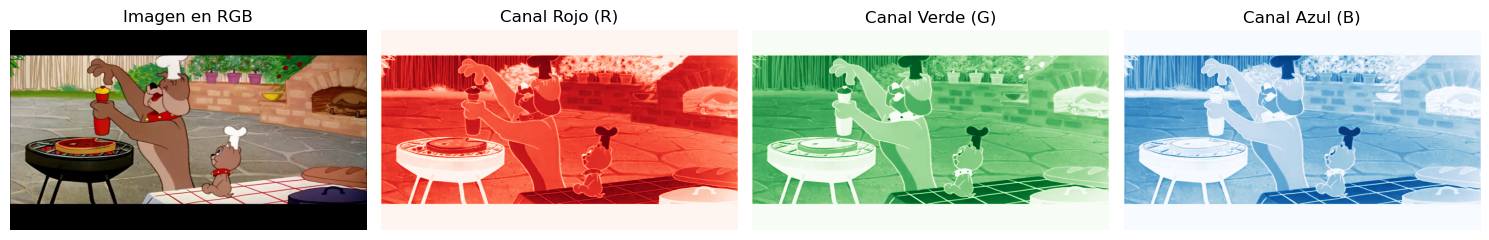

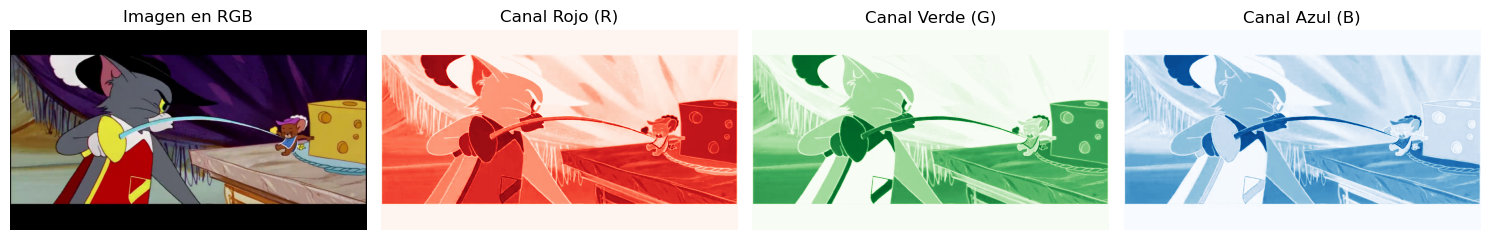

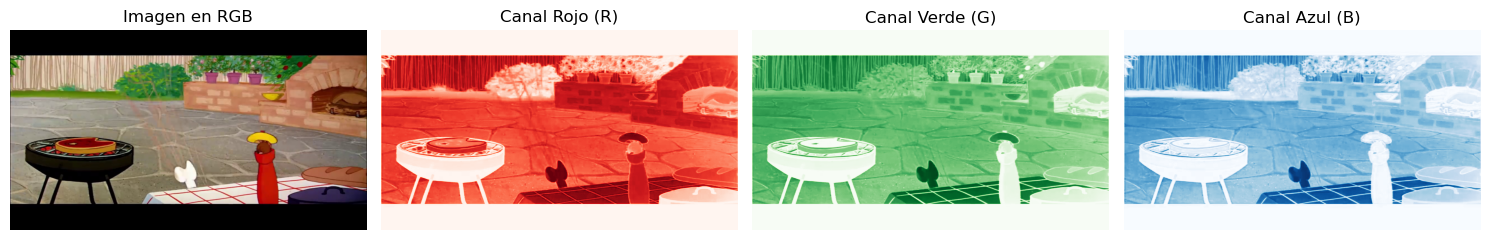

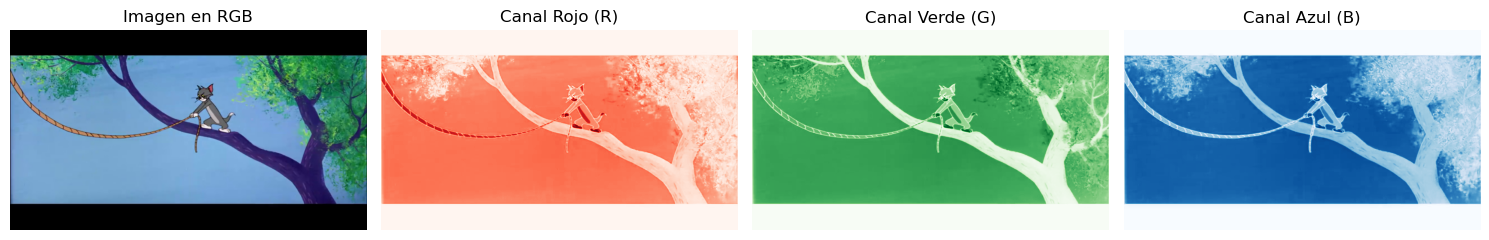

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# Función para procesar y mostrar cada imagen
def procesar_imagen(ruta_imagen):
    # Cargar imagen
    image = cv2.imread(ruta_imagen)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

    # Mostrar la imagen en el modelo RGB
    plt.figure(figsize=(15, 5))

    # Subplot 1: Mostrar la imagen RGB
    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title("Imagen en RGB")
    plt.axis('off')

    # Separar los canales de color
    r, g, b = cv2.split(image_rgb)

    # Mostrar cada canal de color individualmente
    plt.subplot(1, 4, 2)
    plt.imshow(r, cmap='Reds')
    plt.title("Canal Rojo (R)")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(g, cmap='Greens')
    plt.title("Canal Verde (G)")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(b, cmap='Blues')
    plt.title("Canal Azul (B)")
    plt.axis('off')

    # Mostrar todos los gráficos
    plt.tight_layout()
    plt.show()

# Ruta de la carpeta de imágenes
carpeta_imagenes = 'datos_PDI/Tom_and_Jerry'

# Obtener todos los nombres de imagen en la carpeta
imagenes = os.listdir(carpeta_imagenes)

# Procesar cada imagen en la carpeta
for nombre_imagen in imagenes:
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
    procesar_imagen(ruta_imagen)

## Modelo de color HSI

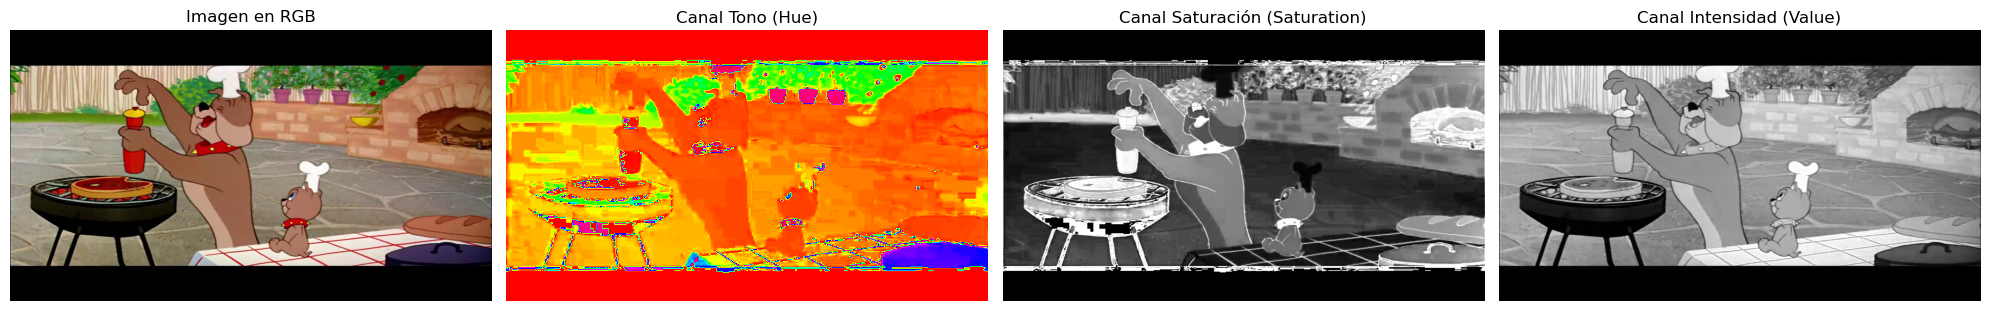

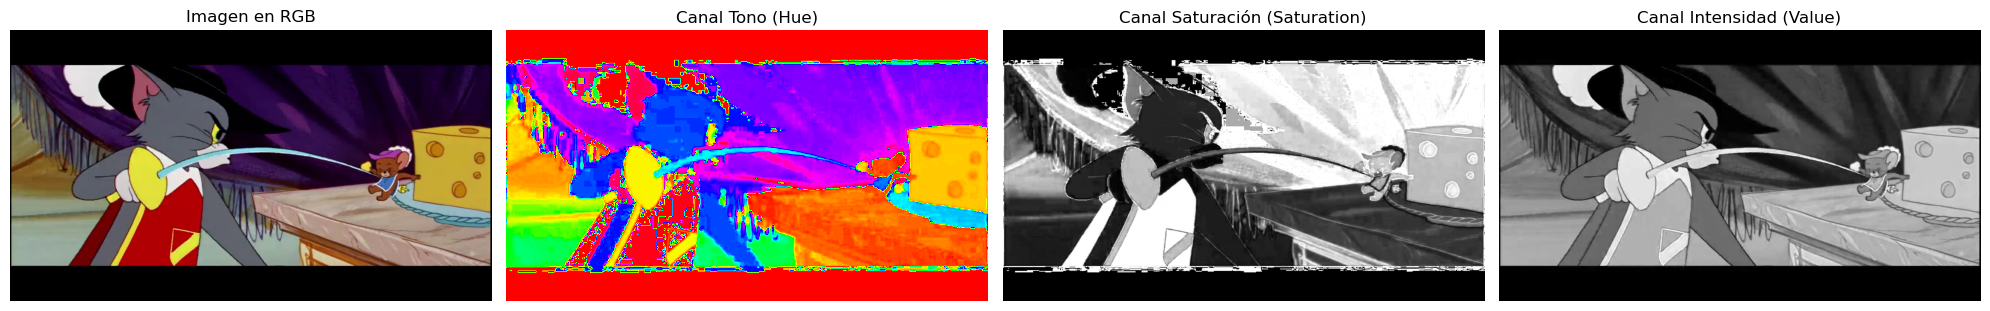

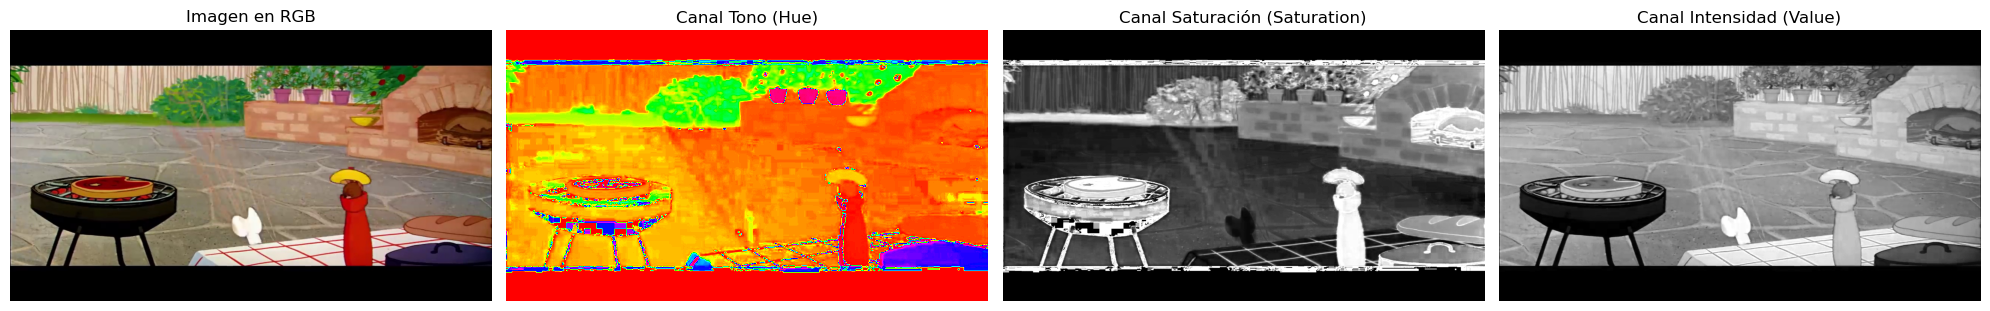

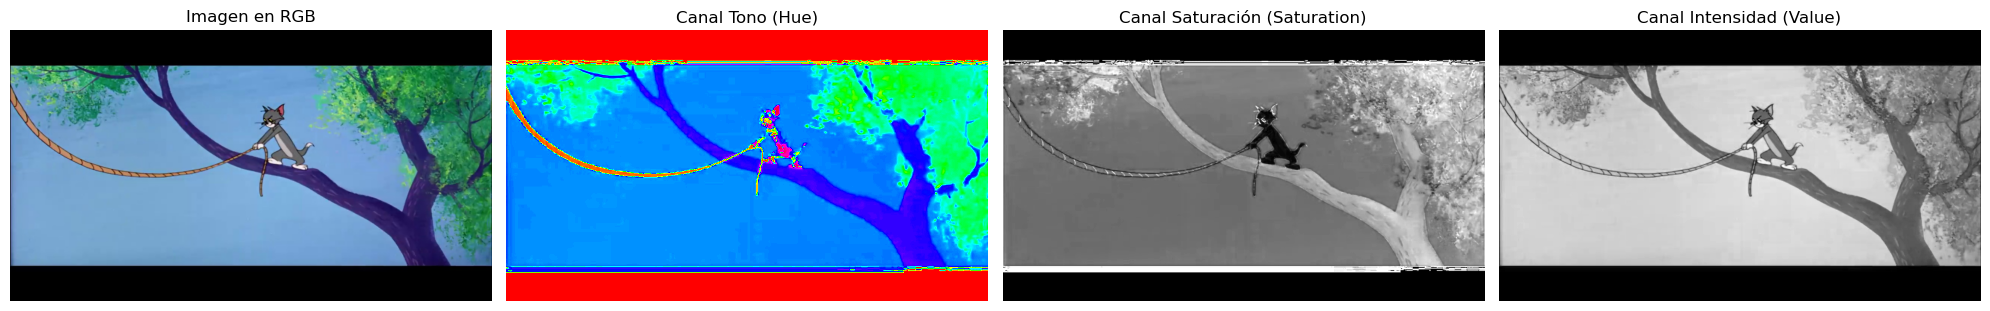

In [6]:
import cv2
import matplotlib.pyplot as plt
import os

# Función para procesar y mostrar cada imagen
def procesar_imagen(ruta_imagen):
    # Cargar imagen
    image = cv2.imread(ruta_imagen)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

    # Convertir la imagen de RGB a HSV
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Separar los canales Hue, Saturation y Value
    h, s, v = cv2.split(image_hsv)

    # Mostrar la imagen en RGB y los canales HSV
    plt.figure(figsize=(20, 5))

    # Subplot 1: Mostrar la imagen RGB
    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title("Imagen en RGB")
    plt.axis('off')

    # Mostrar cada canal HSV individualmente
    plt.subplot(1, 4, 2)
    plt.imshow(h, cmap='hsv')
    plt.title("Canal Tono (Hue)")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(s, cmap='gray')
    plt.title("Canal Saturación (Saturation)")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(v, cmap='gray')
    plt.title("Canal Intensidad (Value)")
    plt.axis('off')

    # Mostrar todos los gráficos
    plt.tight_layout()
    plt.show()

# Ruta de la carpeta de imágenes
#carpeta_imagenes = '/content/drive/MyDrive/datos_PDI/Tom_and_Jerry'
carpeta_imagenes = 'datos_PDI/Tom_and_Jerry'

# Obtener todos los nombres de imagen en la carpeta
imagenes = os.listdir(carpeta_imagenes)

# Procesar cada imagen en la carpeta
for nombre_imagen in imagenes:
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
    procesar_imagen(ruta_imagen)


## Histograma

**Imágenes: LOL (LOw-Light dataset) de Kaggle**

"The LOL dataset is composed of 500 low-light and normal-light image pairs and is divided into 485 training pairs and 15 testing pairs.
The low-light images contain noise produced during the photo capture process.
Most of the images are indoor scenes.
All the images have a resolution of 400×600."

In [7]:
import os

# Definir la ruta de la carpeta
#carpeta_imagenes = '/content/drive/MyDrive/datos_PDI/LOL_dataset/'
carpeta_imagenes = 'datos_PDI/LOL_dataset/'

# Listar todos los archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

# Filtrar solo las imágenes (por ejemplo, archivos con extensión .jpg o .png)
imagenes = [archivo for archivo in archivos if archivo.endswith(('.jpg', '.png'))]

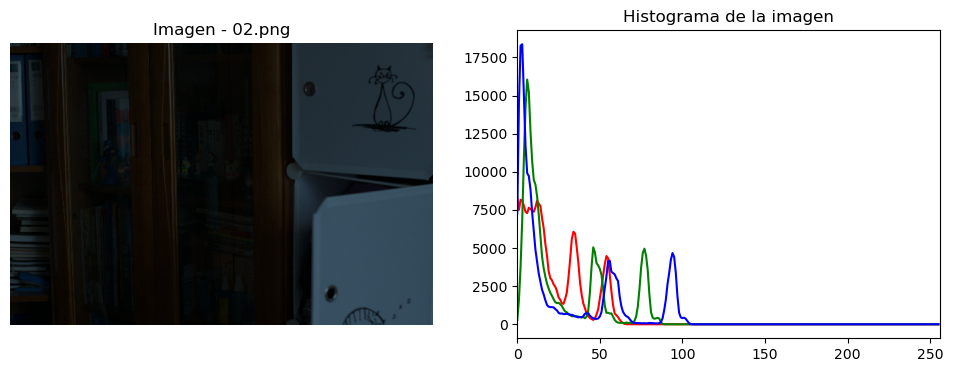

<Figure size 640x480 with 0 Axes>

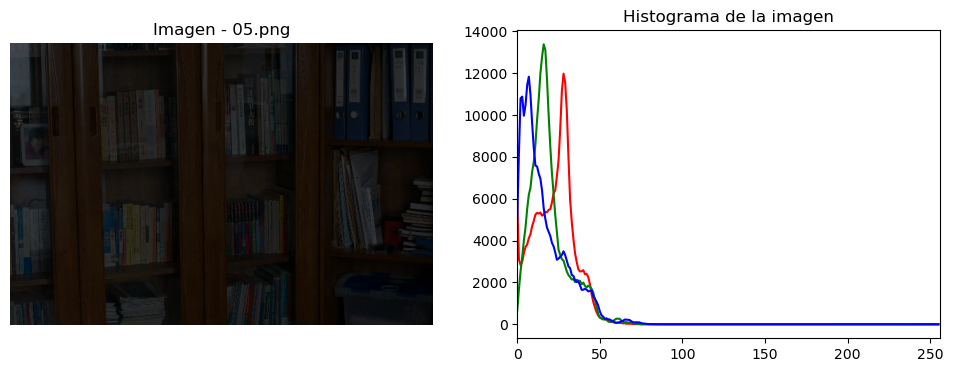

<Figure size 640x480 with 0 Axes>

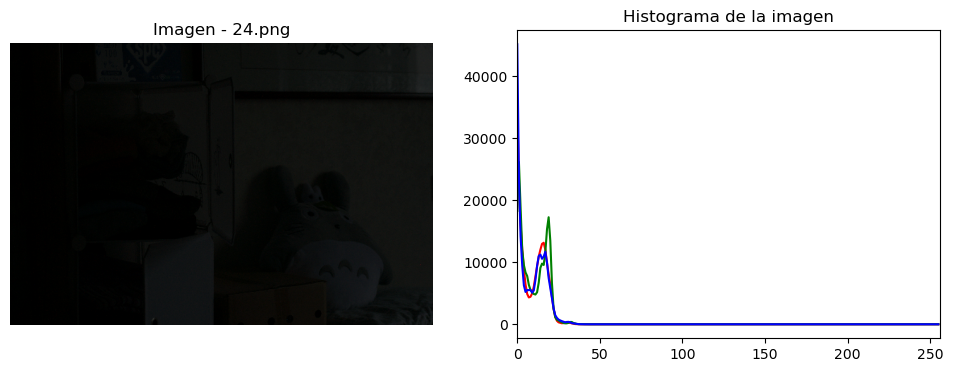

<Figure size 640x480 with 0 Axes>

In [8]:
import cv2
import matplotlib.pyplot as plt

# Función para calcular y mostrar el histograma
def mostrar_histograma(img):
    colores = ('r', 'g', 'b')  # Canales de color
    for i, color in enumerate(colores):
        histograma = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histograma, color=color)
        plt.xlim([0, 256])
    plt.title("Histograma de la imagen")
    plt.show()

# Recorrer todas las imágenes de la carpeta
for nombre_imagen in imagenes:
    # Cargar la imagen
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
    imagen = cv2.imread(ruta_imagen)

    if imagen is not None:
        # Convertir de BGR a RGB para mostrar correctamente
        imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

        # Crear una figura con 2 subplots: imagen y su histograma
        plt.figure(figsize=(12, 4))

        # Subplot 1: Mostrar la imagen
        plt.subplot(1, 2, 1)
        plt.imshow(imagen_rgb)
        plt.title(f"Imagen - {nombre_imagen}")
        plt.axis('off')

        # Subplot 2: Mostrar el histograma
        plt.subplot(1, 2, 2)
        mostrar_histograma(imagen_rgb)

        # Mostrar ambos gráficos
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error al cargar la imagen: {nombre_imagen}")

## Brillo

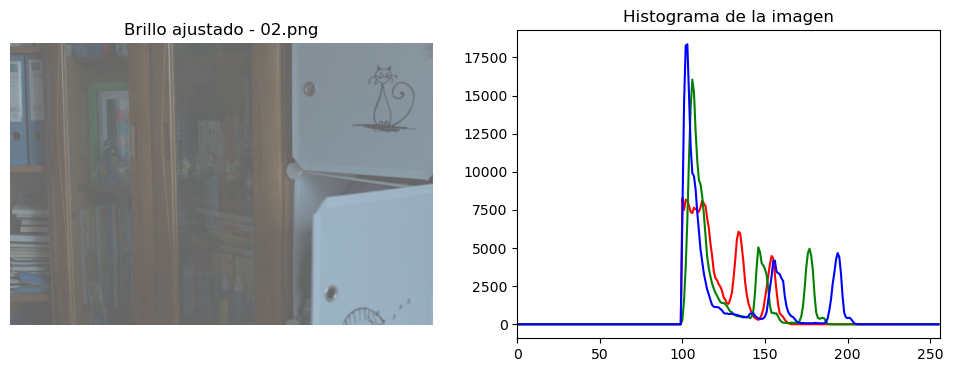

<Figure size 640x480 with 0 Axes>

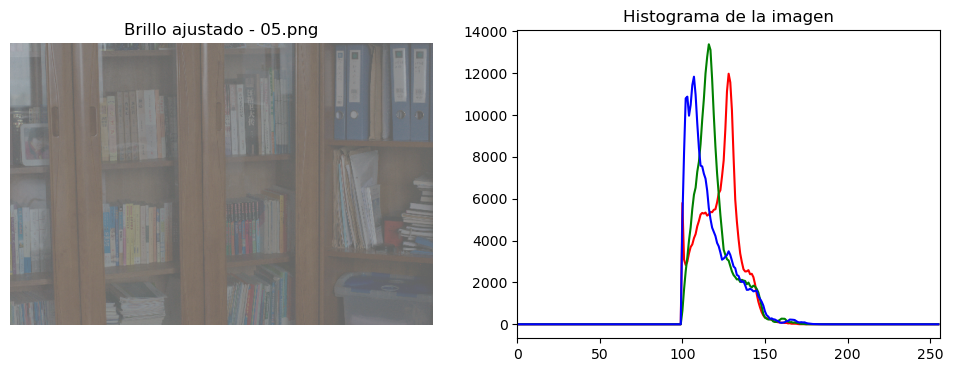

<Figure size 640x480 with 0 Axes>

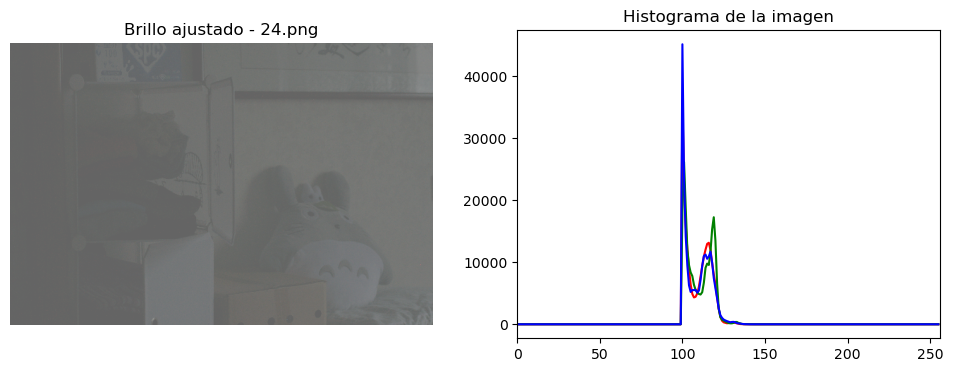

<Figure size 640x480 with 0 Axes>

In [9]:
import cv2
import matplotlib.pyplot as plt

parametro_brillo = 100

def ajustar_brillo(img, beta_value):
    """Función para ajustar el brillo."""
    nueva_imagen = img+beta_value
    #nueva_imagen = cv2.convertScaleAbs(img, beta=beta_value)
    return nueva_imagen


# Recorrer todas las imágenes de la carpeta
for nombre_imagen in imagenes:
    # Cargar la imagen
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
    imagen = cv2.imread(ruta_imagen)

    if imagen is not None:
        # Convertir de BGR a RGB para mostrar correctamente
        imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

        # Ajustar el brillo de la imagen
        imagen_brillo = ajustar_brillo(imagen_rgb, parametro_brillo)

        # Crear una figura con 2 subplots: imagen con brillo ajustado y su histograma
        plt.figure(figsize=(12, 4))

        # Subplot 1: Mostrar la imagen con el brillo ajustado
        plt.subplot(1, 2, 1)
        plt.imshow(imagen_brillo)
        plt.title(f"Brillo ajustado - {nombre_imagen}")
        plt.axis('off')

        # Subplot 2: Mostrar el histograma de la imagen con brillo ajustado
        plt.subplot(1, 2, 2)
        mostrar_histograma(imagen_brillo)

        # Mostrar ambos gráficos
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error al cargar la imagen: {nombre_imagen}")

## Contraste

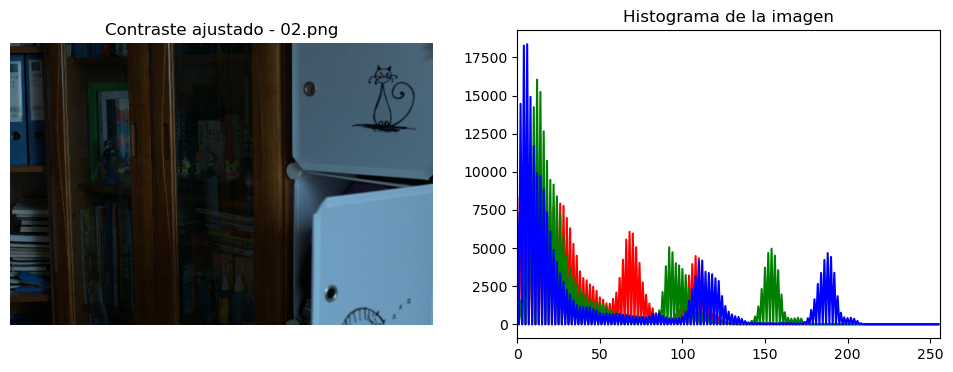

<Figure size 640x480 with 0 Axes>

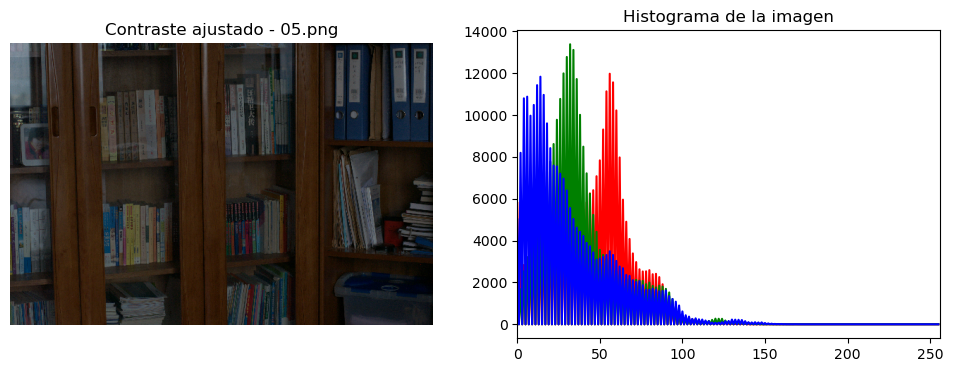

<Figure size 640x480 with 0 Axes>

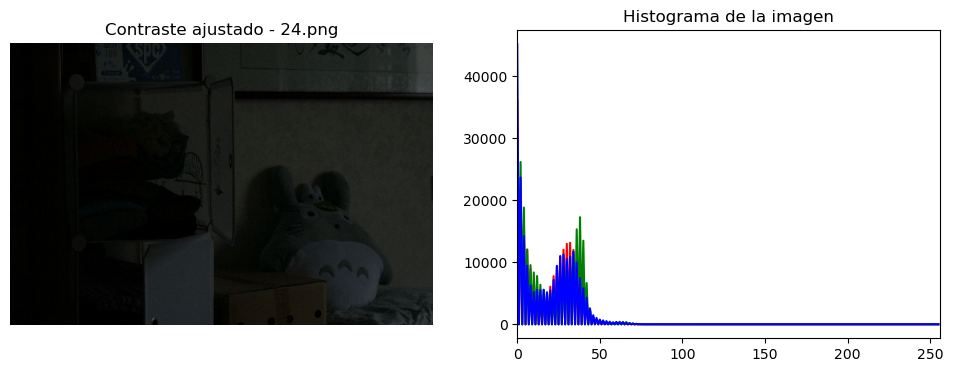

<Figure size 640x480 with 0 Axes>

In [10]:
# Parámetro de contraste (ajustable)
# 1.5 = 50% más contraste
parametro_contraste = 2


# Función para ajustar el contraste
def ajustar_contraste(img, alpha_value):
    nueva_imagen = img * alpha_value
    if nueva_imagen.max() > 255:
        nueva_imagen = nueva_imagen / nueva_imagen.max() * 255
    # redondear y convertir a enteros para el cálculo de histograma
    nueva_imagen = nueva_imagen.round().astype('uint8')
    return nueva_imagen


# Recorrer todas las imágenes de la carpeta
for nombre_imagen in imagenes:
    # Cargar la imagen
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
    imagen = cv2.imread(ruta_imagen)

    if imagen is not None:
        # Convertir de BGR a RGB para mostrar correctamente
        imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

        # Ajustar el contraste de la imagen
        imagen_contraste = ajustar_contraste(imagen_rgb, parametro_contraste)

        # Crear una figura con 2 subplots: imagen con contraste ajustado y su histograma
        plt.figure(figsize=(12, 4))

        # Subplot 1: Mostrar la imagen con el contraste ajustado
        plt.subplot(1, 2, 1)
        plt.imshow(imagen_contraste)
        plt.title(f"Contraste ajustado - {nombre_imagen}")
        plt.axis('off')

        # Subplot 2: Mostrar el histograma de la imagen con contraste ajustado
        plt.subplot(1, 2, 2)
        mostrar_histograma(imagen_contraste)

        # Mostrar ambos gráficos
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error al cargar la imagen: {nombre_imagen}")

**EJERCICIO:**

Combinar en la misma función los procesos de ajuste de brillo y manejo del contraste.

## Umbralización

**Chinese MNIST**

 El dataset contiene 15.000 caracteres chinos, correspondientes a:
 - 100 voluntarios
 - 10 conjuntos de imágenes cada voluntario
 - 15 caracteres por conjunto

 (cada usuario realizó 150 caracteres en total).

https://www.kaggle.com/datasets/gpreda/chinese-mnist

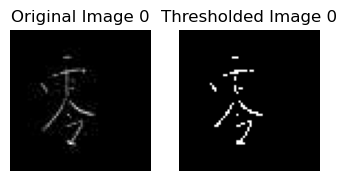

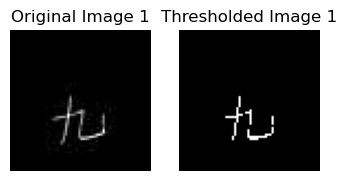

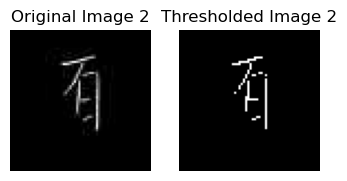

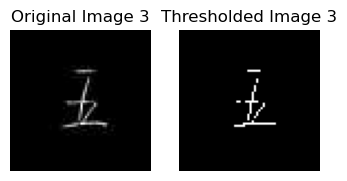

In [11]:
import cv2
import matplotlib.pyplot as plt
import os

# Ruta a la carpeta de imágenes
#folder_path = '/content/drive/MyDrive/datos_PDI/Chinese_MNIST/'
folder_path = 'datos_PDI/Chinese_MNIST/'

# Obtener la lista de archivos en la carpeta y filtrar solo los archivos .png
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Mostrar imágenes desde la 0 a la 4
for i in range(len(image_files)):
    # Construir la ruta completa a la imagen
    image_path = os.path.join(folder_path, image_files[i])

    # Leer la imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    # Aplicar umbralización
    _, thresh_img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

    # Mostrar la imagen original y la umbralizada
    plt.figure(figsize=(4, 2))

    # Mostrar imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original Image {i}')
    plt.axis('off')

    # Mostrar imagen umbralizada
    plt.subplot(1, 2, 2)
    plt.imshow(thresh_img, cmap='gray')
    plt.title(f'Thresholded Image {i}')
    plt.axis('off')

    # Mostrar las imágenes
    plt.show()

PREGUNTAS:

- ¿Cuál será el umbral óptimo?
- ¿Hay un límite inferior donde el umbral deje de ser óptimo? ¿Qué comportamiento se observa al bajar el umbral más allá del límite inferior óptimo?
- ¿Servirá el mismo umbral para todas las imágenes del dataset? En todo dataset, ¿siempre se podrá encontrar un umbral global para separar objeto de fondo?